In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Note:
for reproducing the same results, it is recommened to download 2 datasets whose links are as follows https://drive.google.com/file/d/1Ny95w5aytl3jyTfSx7ALluaYgalMk5eo and https://drive.google.com/file/d/1lHgLcR_C4hmJXozvB-wjeLJOF7th6Nel and upload them to the `Colab Notebooks` folder of your Google drive, alternatively one can change the loaction of files from the code if needed to.

In [ ]:
df = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/consumer_complaints.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [ ]:
df.shape

(555957, 18)

### Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [ ]:
df.isnull().sum()

date_received                        0
product                              0
sub_product                     158322
issue                                0
sub_issue                       343335
consumer_complaint_narrative    489151
company_public_response         470833
company                              0
state                             4887
zipcode                           4505
tags                            477998
consumer_consent_provided       432499
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed?                   0
complaint_id                         0
dtype: int64

Mortgage                   33.54
Debt collection            18.18
Credit reporting           16.52
Credit card                11.96
Bank account or service    11.25
Consumer Loan               3.78
Student loan                2.85
Payday loan                 0.70
Money transfers             0.69
Prepaid card                0.44
Other financial service     0.10
Name: product, dtype: float64


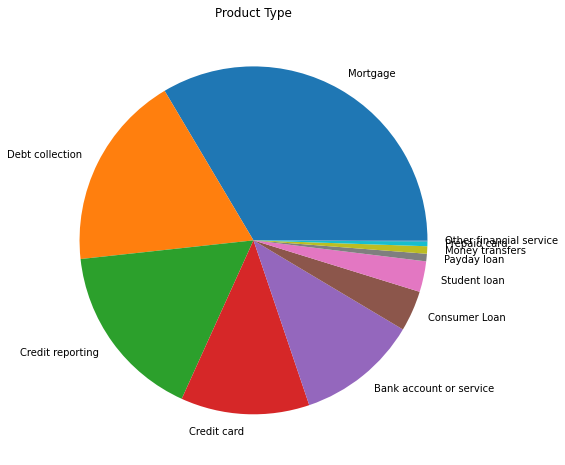

In [ ]:
p_product_discussions = round(df["product"].value_counts() / len(df["product"]) * 100,2)

print(p_product_discussions)

labels = list(p_product_discussions.index)
value = p_product_discussions.values.tolist()
colors = ['#F78181', '#F5A9BC', '#2E9AFE', '#58FA58', '#FAAC58', '#088A85', '#8A0808', '#848484', '#F781F3', '#D7DF01', '#2E2EFE']

plt.figure(figsize=[8,8])
product_pie = plt.pie(value,labels=labels)
plt.title('Product Type')
plt.show()

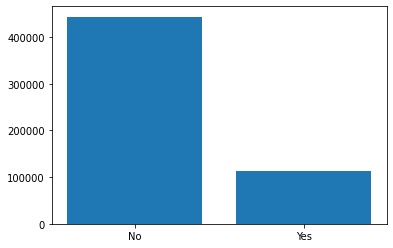

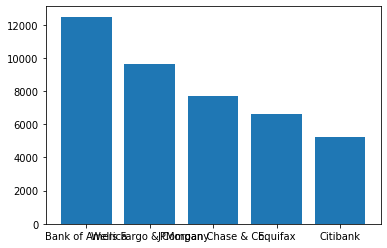

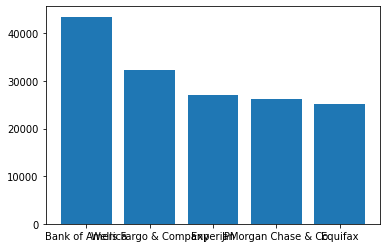

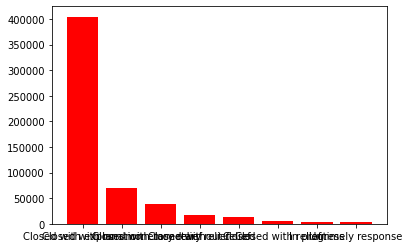

In [ ]:
df['company_response_to_consumer'].value_counts()
disputed = df['consumer_disputed?'].value_counts()
company_response = df['company_response_to_consumer'].value_counts()
top5_disputed = df['company'].loc[df['consumer_disputed?'] == 'Yes'].value_counts()[:5]
top5_nodispute = df['company'].loc[df['consumer_disputed?'] == 'No'].value_counts()[:5]

# Top three subplots

total_complaints_plotly = plt.bar(disputed.index.values,disputed.values)
plt.show()

top5_disputes_plotly = plt.bar(top5_disputed.index.values,top5_disputed.values)
plt.show()

top5_nodisputes_plotly = plt.bar(top5_nodispute.index.values,top5_nodispute.values)
plt.show()

# Lower Subplot

customer_res_plotly = plt.bar(company_response.index.values,company_response.values,color = 'red')
plt.show()

### Removing outliers

### Feature Engineering on dataset

In [ ]:
data = df
data = data.drop(["complaint_id"], axis = 1)
data = data.replace({pd.np.nan: None})
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",None,None,None,U.S. Bancorp,CA,95993,None,None,Referral,09/03/2013,Closed with explanation,Yes,Yes
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",None,None,None,Wells Fargo & Company,CA,91104,None,None,Referral,09/03/2013,Closed with explanation,Yes,Yes
2,08/30/2013,Credit reporting,None,Incorrect information on credit report,Account status,None,None,Wells Fargo & Company,NY,11764,None,None,Postal mail,09/18/2013,Closed with explanation,Yes,No
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,None,None,"Navient Solutions, Inc.",MD,21402,None,None,Email,08/30/2013,Closed with explanation,Yes,Yes
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,None,None,Resurgent Capital Services L.P.,GA,30106,None,None,Web,08/30/2013,Closed with explanation,Yes,Yes


In [ ]:
data_rows, data_columns = data.shape

### Getting cleaned dataset

In [ ]:
cleaned_data = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/consumer_complaints_new.csv')
cleaned_data.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,03/19/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,XXXX has claimed I owe them {$27.00} for XXXX ...,NaN,"Diversified Consultants, Inc.",NY,121XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290516
1,03/19/2015,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,Due to inconsistencies in the amount owed that...,NaN,M&T Bank Corporation,VA,221XX,Servicemember,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290492
2,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,In XX/XX/XXXX my wages that I earned at my job...,NaN,Wells Fargo & Company,CA,946XX,NaN,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290524
3,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,I have an open and current mortgage with Chase...,NaN,JPMorgan Chase & Co.,CA,900XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290253
4,03/19/2015,Mortgage,Conventional fixed mortgage,Credit decision / Underwriting,NaN,XXXX was submitted XX/XX/XXXX. At the time I s...,NaN,Rushmore Loan Management Services LLC,CA,956XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1292137


In [ ]:
cleaned_data = cleaned_data.drop(["complaint_id"], axis = 1)
cd_rows, cd_columns = cleaned_data.shape
cd_rows

66806

### Sentiment Analysis using text blob

In [ ]:
from textblob import TextBlob

sentiments = []
for i in range (cd_rows):
  value = cleaned_data.iloc[i, 5]
  blob = TextBlob(value)
  sentiments.append(blob.sentiment.polarity)

In [ ]:
len(sentiments)

66806

In [ ]:
for i in range(len(sentiments)):
  sentiments[i] = int(sentiments[i]*1000)
  if sentiments[i] < -20:
    sentiments[i] = 1
  elif sentiments[i] < -10:
    sentiments[i] = 2
  elif sentiments[i] < 10:
    sentiments[i] = 3
  elif sentiments[i] < 50:
    sentiments[i] = 4
  else:
    sentiments[i] = 5

In [ ]:
cleaned_data = cleaned_data.assign(sentiments = sentiments)
cleaned_data.head(100)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,sentiments
0,03/19/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,XXXX has claimed I owe them {$27.00} for XXXX ...,NaN,"Diversified Consultants, Inc.",NY,121XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,3
1,03/19/2015,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,Due to inconsistencies in the amount owed that...,NaN,M&T Bank Corporation,VA,221XX,Servicemember,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,5
2,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,In XX/XX/XXXX my wages that I earned at my job...,NaN,Wells Fargo & Company,CA,946XX,NaN,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1
3,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,I have an open and current mortgage with Chase...,NaN,JPMorgan Chase & Co.,CA,900XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,3
4,03/19/2015,Mortgage,Conventional fixed mortgage,Credit decision / Underwriting,NaN,XXXX was submitted XX/XX/XXXX. At the time I s...,NaN,Rushmore Loan Management Services LLC,CA,956XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,03/19/2015,Student loan,Non-federal student loan,Dealing with my lender or servicer,Having problems with customer service,"On XXXX XXXX, XXXX I submitted documentation t...",Company chooses not to provide a public response,"ECMC Group, Inc.",CA,907XX,NaN,Consent provided,Web,03/25/2015,Closed with explanation,Yes,No,1
96,03/19/2015,Payday loan,Payday loan,Can't contact lender,Can't contact lender,I have been approached by Concord Resolution (...,NaN,Concord Resolution Inc (Closed),TX,752XX,NaN,Consent provided,Web,03/26/2015,Closed with explanation,No,No,3
97,03/19/2015,Credit reporting,NaN,Incorrect information on credit report,Reinserted previously deleted info,I have been disputing with Experian for over 1...,Company chooses not to provide a public response,Experian,TX,751XX,NaN,Consent provided,Web,03/19/2015,Closed with non-monetary relief,Yes,Yes,5
98,03/19/2015,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,Primary loan with XXXX requested an unpaid pri...,Company chooses not to provide a public response,Bank of America,FL,330XX,NaN,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,5


In [ ]:
x = cleaned_data.drop([], axis = 1)
y = cleaned_data["sentiments"]

x = x.replace({pd.np.nan: None})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.


# Note:
run ```!pip install turicreate``` to install turicreaten and then restart runtime to run the program

In [ ]:
!pip install turicreate

     |████████████████████████████████| 92.0 MB 15 kB/s 
     |████████████████████████████████| 3.6 MB 41.4 MB/s 
     |████████████████████████████████| 86.4 MB 76 kB/s 
     |████████████████████████████████| 3.5 MB 39.9 MB/s 
     |████████████████████████████████| 322 kB 58.9 MB/s 
     |████████████████████████████████| 18.3 MB 431 kB/s 
     |████████████████████████████████| 2.9 MB 45.3 MB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 
     |████████████████████████████████| 449 kB 71.8 MB/s 
     |████████████████████████████████| 3.8 MB 40.6 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=37b22a9ccb53b562cf81900d8d5d82357214d8ddcfc51a9d3c83489cfc4c8678
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6
  Created wheel for resampy: filename=resampy-0.2.1-py3-none-any.whl size=320859 sha256=6907ead67d3

In [ ]:
import turicreate as tc
tc_x = tc.SFrame(x)
tc_y = tc.SFrame(y)
tc_x['word_count'] = tc.text_analytics.count_words(tc_x['issue'])

In [ ]:
train_data, test_data = tc_x.random_split(.4,seed=0)  
model = tc.logistic_classifier.create(train_data,
                                target = 'sentiments',
                                features = ['product', 'sub_product', 'issue', 'sub_issue', 'company', 'state'],
                                validation_set = test_data,
                                max_iterations=10)

Logistic regression:

--------------------------------------------------------

Number of examples          : 26563

Number of classes           : 5

Number of feature columns   : 6

Number of unpacked features : 6

Number of coefficients      : 7772

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 1.042368     | 0.340398          | 0.327510            |

| 1         | 4        | 1.000000  | 1.242464     | 0.371984          | 0.329548            |

| 2         | 5        | 1.000000  | 1.432872     | 0.422919          | 0.354621            |

| 3         | 6        | 1.000000  | 1.626180     | 0.429997          | 0.361057            |

| 4         | 11       | 0.831041  | 1.887030     | 0.436246          | 0.361305            |

| 9         | 18       | 1.000000  | 2.969976     | 0.438015          | 0.361305            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [ ]:
model.evaluate(test_data)

{'accuracy': 0.3613050716894864,
 'auc': 0.544903094152095,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 25
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        3        |  907  |
 |      1       |        1        |  7330 |
 |      3       |        5        |  2625 |
 |      3       |        3        |  702  |
 |      3       |        1        |  3508 |
 |      1       |        2        |   32  |
 |      4       |        4        |  179  |
 |      4       |        1        |  2404 |
 |      5       |        2        |   39  |
 |      5       |        4        |  276  |
 +--------------+-----------------+-------+
 [25 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.2139352477754246,
 'log_loss': 1.5672718800354308,


### Predicting other info regaring given issue

#### Company Response to Consumer

In [ ]:
company_response_x = data.drop([], axis = 1)

tc_cr_x = tc.SFrame(company_response_x)

train_cr_data, test_cr_data = tc_cr_x.random_split(.6,seed=0)  
model_cr = tc.logistic_classifier.create(train_cr_data,
                                target = 'company_response_to_consumer',
                                features = ['product', 'issue', 'company'],
                                validation_set = test_cr_data,
                                max_iterations=10)

Logistic regression:

--------------------------------------------------------

Number of examples          : 333773

Number of classes           : 8

Number of feature columns   : 3

Number of unpacked features : 3

Number of coefficients      : 23065

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 5.000000  | 1.221817     | 0.727156          | 0.727478            |

| 1         | 7        | 1.250000  | 8.862237     | 0.742124          | 0.741142            |

| 2         | 8        | 1.250000  | 14.903960    | 0.738133          | 0.735598            |

| 3         | 13       | 1.141772  | 19.606674    | 0.742951          | 0.741314            |

| 4         | 14       | 1.141772  | 23.572121    | 0.745105          | 0.743388            |

| 6         | 20       | 0.812607  | 32.217735    | 0.745941          | 0.743582            |

| 7         | 21       | 1.000000  | 36.174543    | 0.746325          | 0.744014            |

| 8         | 22       | 1.000000  | 40.131823    | 0.746268          | 0.744208            |

| 9         | 23       | 1.000000  | 44.048016    | 0.746873          | 0.744716            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

#### Company Public Response

In [ ]:

company_pub_response_x = data.dropna(subset=['company_public_response'])

tc_pr_x = tc.SFrame(company_pub_response_x)

train_pr_data, test_pr_data = tc_pr_x.random_split(.6,seed=0)  
model_pr = tc.logistic_classifier.create(train_pr_data,
                                target = 'company_public_response',
                                features = ['product', 'sub_product', 'issue', 'sub_issue', 'company', 'state'],
                                validation_set = test_pr_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 51006

Number of classes           : 10

Number of feature columns   : 6

Number of unpacked features : 6

Number of coefficients      : 17055

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.136854     | 0.690762          | 0.687203            |

| 1         | 4        | 1.000000  | 0.684462     | 0.751088          | 0.745384            |

| 2         | 5        | 1.000000  | 1.190864     | 0.795436          | 0.784835            |

| 3         | 6        | 1.000000  | 1.684363     | 0.803062          | 0.785216            |

| 4         | 8        | 0.914637  | 2.254862     | 0.809336          | 0.792749            |

| 9         | 14       | 1.000000  | 4.786051     | 0.816002          | 0.795943            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

#### Timely Response

In [ ]:
timely_response = data.drop([], axis = 1)

tc_tr_x = tc.SFrame(timely_response)

train_tr_data, test_tr_data = tc_tr_x.random_split(.6,seed=0)  
model_tr = tc.logistic_classifier.create(train_tr_data,
                                target = 'timely_response',
                                features = ['product', 'sub_product', 'issue', 'sub_issue', 'company', 'state'],
                                validation_set = test_tr_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 333773

Number of classes           : 2

Number of feature columns   : 6

Number of unpacked features : 6

Number of coefficients      : 3471

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.257691     | 0.974686          | 0.974845            |

| 1         | 4        | 1.000000  | 0.654992     | 0.974755          | 0.974854            |

| 2         | 6        | 1.000000  | 1.037853     | 0.980001          | 0.977789            |

| 3         | 7        | 1.000000  | 1.303596     | 0.979720          | 0.977519            |

| 4         | 8        | 1.000000  | 1.584144     | 0.979552          | 0.977591            |

| 9         | 13       | 1.000000  | 2.923557     | 0.979911          | 0.977492            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

#### Consumer Disputed

In [ ]:
con_disputed = data.drop([], axis = 1)

tc_dis_x = tc.SFrame(con_disputed)

train_dis_data, test_dis_data = tc_dis_x.random_split(.6,seed=0)  
model_dis = tc.logistic_classifier.create(train_dis_data,
                                target = 'consumer_disputed?',
                                features = ['product', 'sub_product', 'issue', 'sub_issue', 'company', 'state'],
                                validation_set = test_dis_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 333773

Number of classes           : 2

Number of feature columns   : 6

Number of unpacked features : 6

Number of coefficients      : 3471

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.250115     | 0.798615          | 0.797839            |

| 1         | 4        | 1.000000  | 0.625291     | 0.798734          | 0.797798            |

| 2         | 5        | 1.000000  | 0.907165     | 0.799522          | 0.797443            |

| 3         | 11       | 4.942241  | 1.752912     | 0.799283          | 0.795678            |

| 4         | 13       | 3.737350  | 2.139600     | 0.799223          | 0.795966            |

| 9         | 24       | 1.158318  | 4.197043     | 0.799510          | 0.796502            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [ ]:
import numpy as np
out = []
input_list = ['Opening account', '', 'Name entered incorrect', 'Name entered incorrect', 'Wells Fargo & Company', 'CA']
narration = 'this is damn good'

if narration == '':
  narration = input_list[2] + ' ' + input_list[3]

value = narration
blob = TextBlob(value)
narr_sent = blob.sentiment.polarity

X_new = tc.SFrame(np.array(input_list))

sent_prediction = list(model.predict(X_new))
sent_out = max(set(sent_prediction), key = sent_prediction.count)

if narr_sent < 0:
  narr_sent = 1
elif narr_sent == 0:
  narr_sent = 2
else:
  narr_sent = 3

sent_out = int((narr_sent + sent_out)/2)

if sent_out == 1:
  print("Sentiment:                 Negative")
elif sent_out == 2:
  print("Sentiment:                 Neutral")
elif sent_out == 3:
  print("Sentiment:                 Positive")

sent_prediction = list(model_tr.predict(X_new))
sent_out = max(set(sent_prediction), key = sent_prediction.count)
print("Timely Response:           {}".format(sent_out))

sent_prediction = list(model_dis.predict(X_new))
sent_out = max(set(sent_prediction), key = sent_prediction.count)
print("Consumer Disputer:         {}".format(sent_out))

sent_prediction = list(model_cr.predict(X_new))
sent_out = max(set(sent_prediction), key = sent_prediction.count)
print("Company Consumer Response: {}".format(sent_out))

sent_prediction = list(model_pr.predict(X_new))
sent_out = max(set(sent_prediction), key = sent_prediction.count)
print("Company Public Response:   {}".format(sent_out))

Sentiment:                 Neutral
Timely Response:           Yes
Consumer Disputer:         No
Company Consumer Response: Closed with explanation
Company Public Response:   Company chooses not to provide a public response
